In [1]:
from barplots import barplots
import os
import pandas as pd
from glob import glob
import compress_pickle

In [18]:
grape_results = pd.concat([
    pd.read_csv(path)
    for path in glob("yue_comparison*")
])
grape_results.graph = [
    graph[3:]
    for graph in grape_results.graph
]
grape_results = grape_results[grape_results.trainable==True]
grape_results.drop(columns=["trainable"], inplace=True)
grape_results = grape_results[grape_results.run_type=="test"]
indices = ["graph", "method"]
grape_results = grape_results.groupby(indices).agg(["mean", "std"])
yue = pd.read_csv("yue_results.csv", index_col=[0,1,2], header=[0, 1]).reset_index().set_index(indices)
all_results = pd.DataFrame(pd.concat([
    grape_results,
    yue
]).drop(columns=["run_type"]).to_dict())

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [24]:
pd.concat([
    grape_results,
    yue
]).sort_index()

AUPRC               AUROC            accuracy  \
                                mean       std      mean       std      mean   
graph       method                                                             
CTDDDA      DeepWalk             NaN       NaN  0.929000  0.002000  0.866000   
            GAE                  NaN       NaN  0.937000  0.001000  0.857000   
            GF                   NaN       NaN  0.884000  0.004000  0.808000   
            GraRep               NaN       NaN  0.960000  0.001000  0.899000   
            Grape CBOW      0.965869  0.000909  0.973369  0.000573  0.922669   
            Grape GloVe     0.965829  0.000828  0.973367  0.000557  0.922588   
            Grape SkipGram  0.965904  0.000846  0.973421  0.000561  0.922857   
            HOPE                 NaN       NaN  0.951000  0.001000  0.886000   
            LINE                 NaN       NaN  0.965000  0.001000  0.904000   
            Laplacian            NaN       NaN  0.856000  0.004000  0.793000   
            SDNE                 NaN       NaN  0.935000  0.010000  0.863000   
            SVD                  NaN       NaN  0.936000  0.002000  0.855000   
            node2vec             NaN       NaN  0.911000  0.002000  0.838000   
            struc2vec            NaN       NaN  0.965000  0.001000  0.903000   
DrugBankDDI DeepWalk             NaN       NaN  0.921000  0.001000  0.840000   
            GAE                  NaN       NaN  0.917000  0.001000  0.836000   
            GF                   NaN       NaN  0.882000  0.003000  0.802000   
            GraRep               NaN       NaN  0.925000  0.001000  0.845000   
            Grape CBOW      0.876401  0.000705  0.899658  0.001148  0.822524   
            Grape GloVe     0.876362  0.000635  0.899677  0.001083  0.822462   
            Grape SkipGram  0.876410  0.000653  0.899669  0.001116  0.822351   
            HOPE                 NaN       NaN  0.923000  0.001000  0.844000   
            LINE                 NaN       NaN  0.905000  0.002000  0.825000   
            Laplacian            NaN       NaN  0.796000  0.002000  0.720000   
            SDNE                 NaN       NaN  0.911000  0.006000  0.833000   
            SVD                  NaN       NaN  0.919000  0.001000  0.837000   
            node2vec             NaN       NaN  0.902000  0.001000  0.819000   
            struc2vec            NaN       NaN  0.904000  0.001000  0.826000   
NDFRTDDA    DeepWalk             NaN       NaN  0.783000  0.004000  0.710000   
            GAE                  NaN       NaN  0.813000  0.007000  0.735000   
            GF                   NaN       NaN  0.720000  0.006000  0.660000   
            GraRep               NaN       NaN  0.963000  0.001000  0.931000   
            Grape CBOW      0.942661  0.002168  0.969867  0.000873  0.942169   
            Grape GloVe     0.942475  0.002213  0.969770  0.000871  0.942051   
            Grape SkipGram  0.942632  0.002061  0.969831  0.000874  0.942154   
            HOPE                 NaN       NaN  0.949000  0.001000  0.928000   
            LINE                 NaN       NaN  0.962000  0.002000  0.934000   
            Laplacian            NaN       NaN  0.930000  0.003000  0.917000   
            SDNE                 NaN       NaN  0.944000  0.004000  0.896000   
            SVD                  NaN       NaN  0.779000  0.003000  0.707000   
            node2vec             NaN       NaN  0.819000  0.005000  0.742000   
            struc2vec            NaN       NaN  0.958000  0.001000  0.913000   
StringPPI   DeepWalk             NaN       NaN  0.884000  0.001000  0.813000   
            GAE                  NaN       NaN  0.900000  0.001000  0.827000   
            GF                   NaN       NaN  0.817000  0.005000  0.746000   
            GraRep               NaN       NaN  0.894000  0.001000  0.823000   
            Grape CBOW      0.911178  0.000490  0.923045  0.000719  0.849601   
            Grape GloVe     0.9

Rendering barplots:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/anaconda3/lib/python3.7/site-packages/barplots/barplot.py:259: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(min_lenght, max_lenght)
/usr/local/anaconda3/lib/python3.7/site-packages/barplots/barplot.py:259: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(min_lenght, max_lenght)
/usr/local/anaconda3/lib/python3.7/site-packages/barplots/barplot.py:259: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(min_lenght, max_lenght)


((<Figure size 3200x840 with 4 Axes>,
  <Figure size 3200x840 with 4 Axes>,
  <Figure size 3200x840 with 4 Axes>),
 (array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8374496dd0>,
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83611b03d0>,
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f836139fd50>,
        dtype=object)))

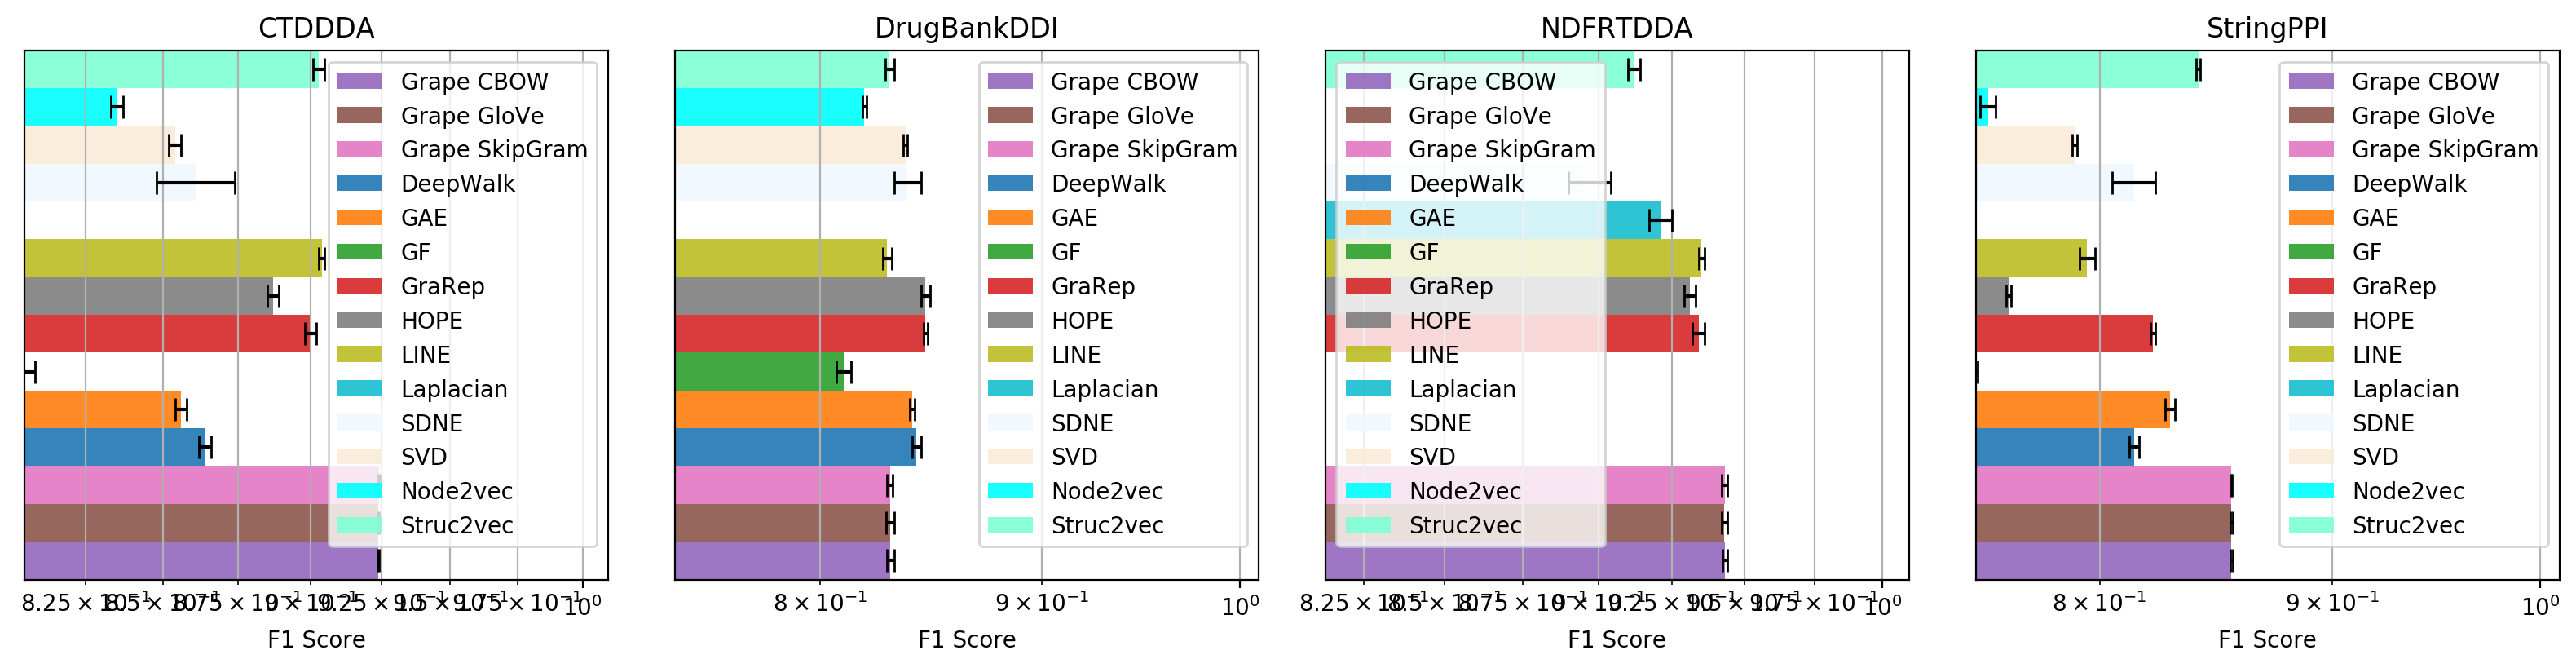

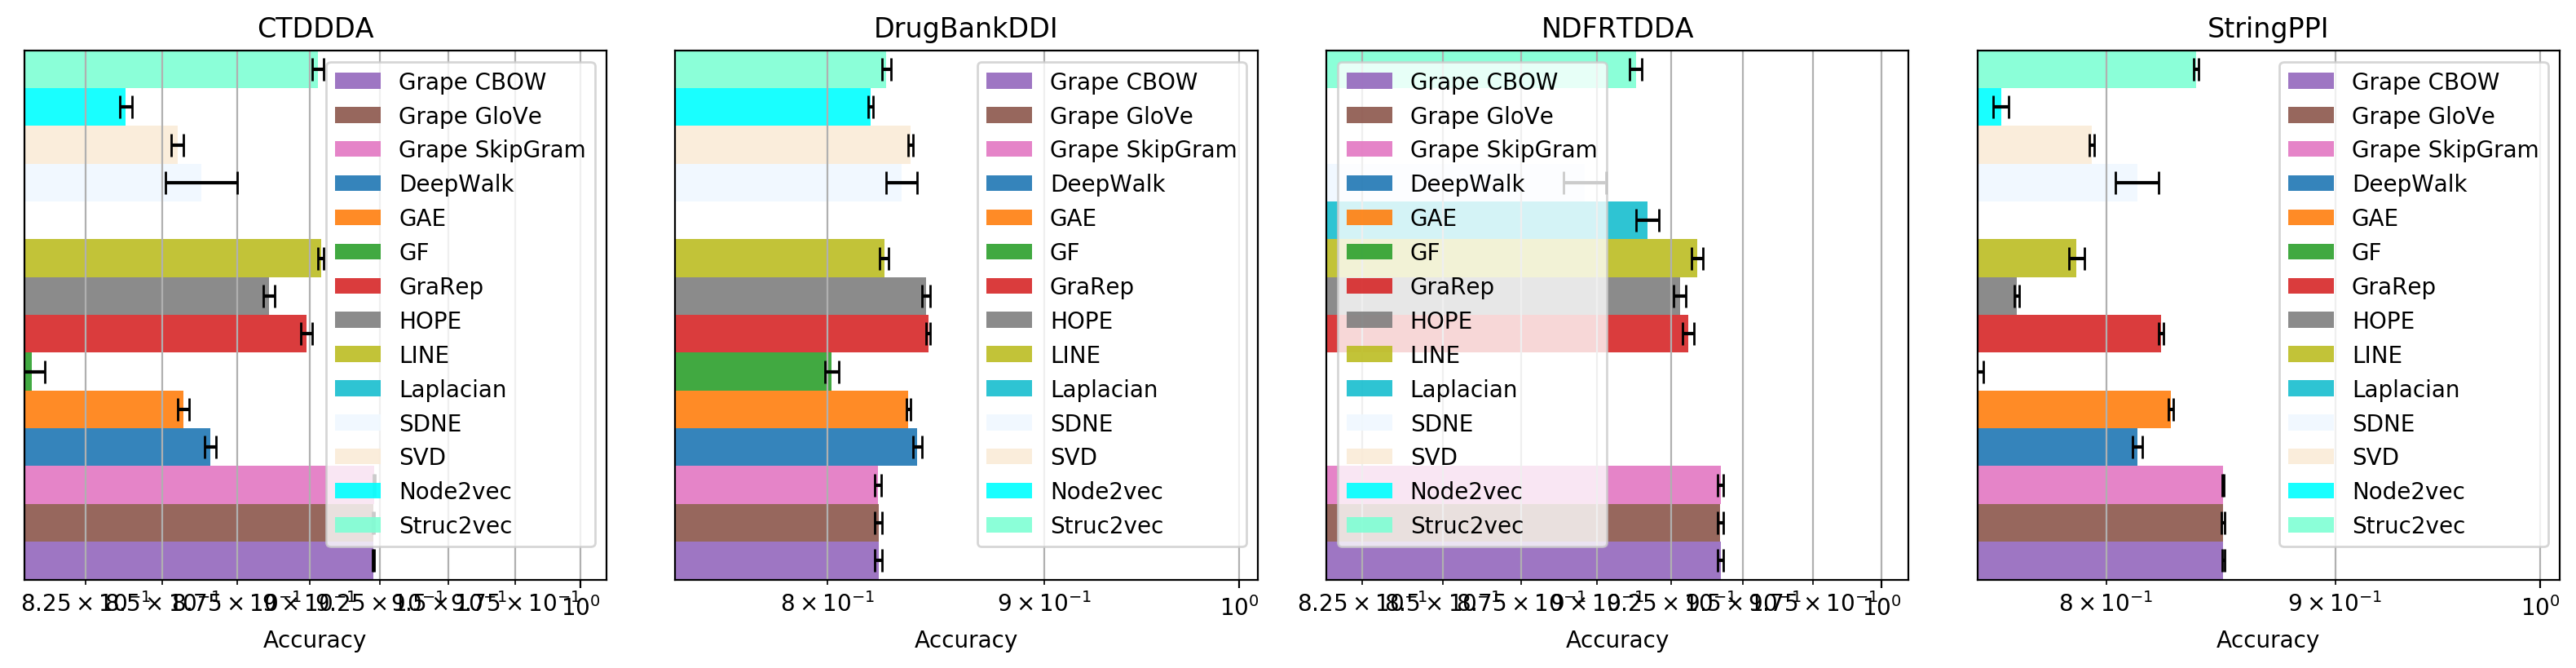

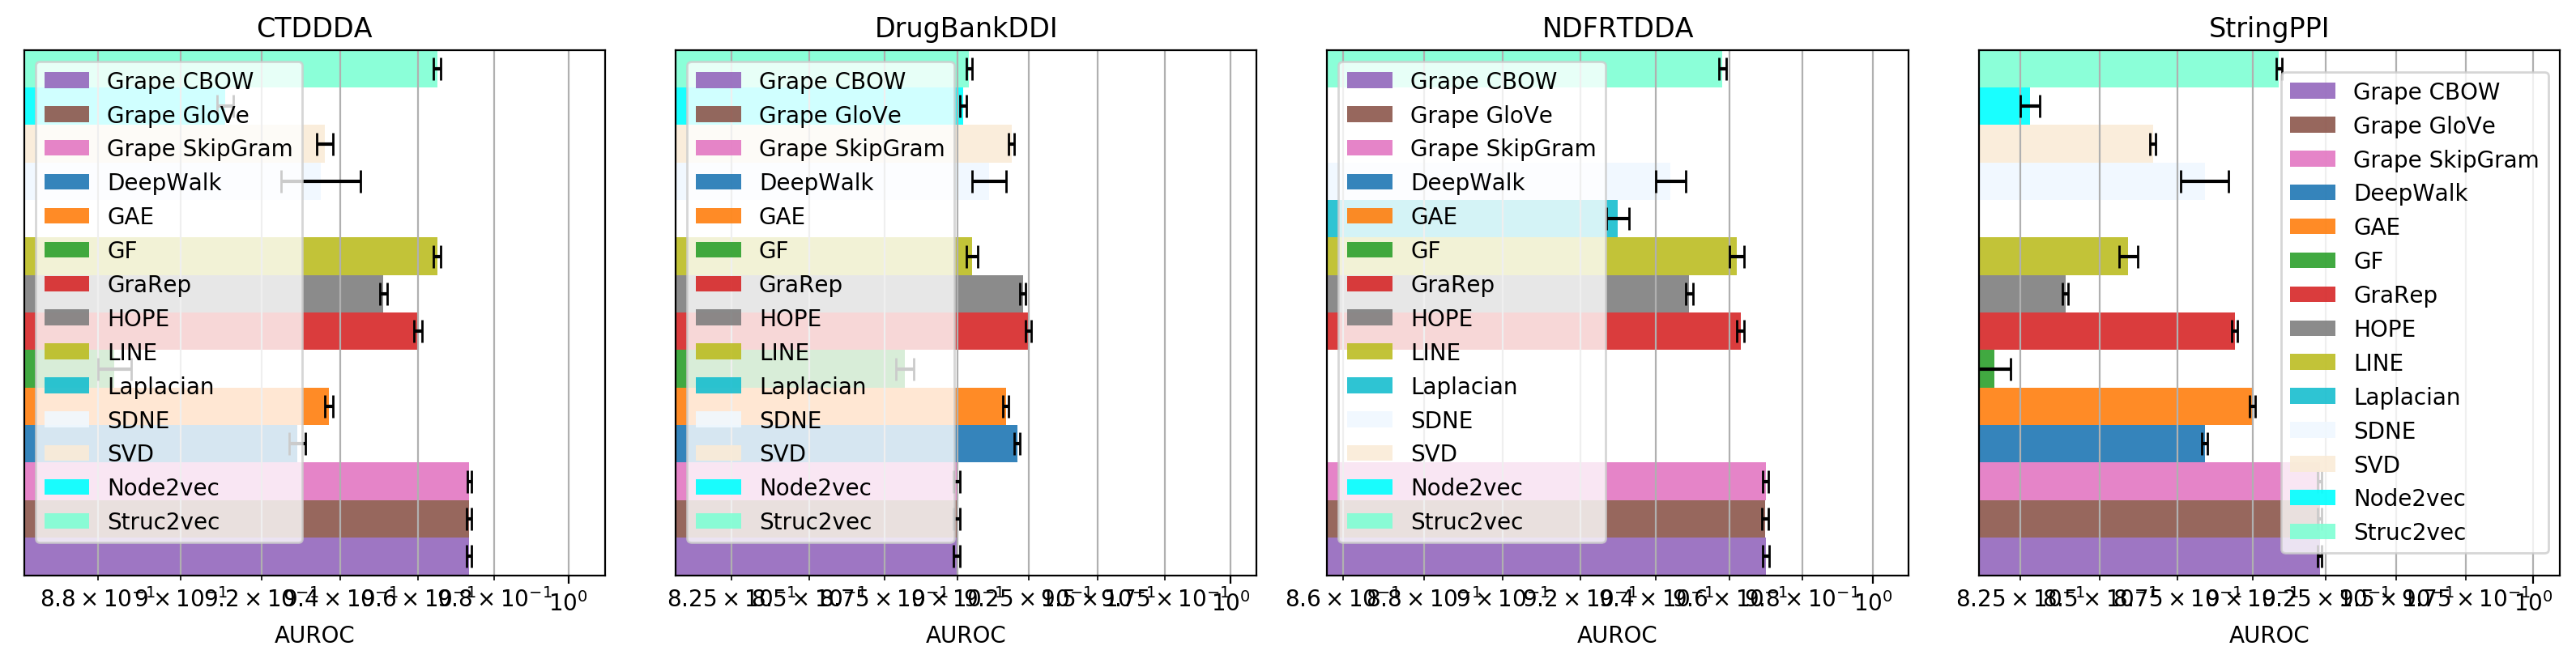

In [25]:
barplots(
    all_results,
    height=4,
    subplots=True,
    orientation="horizontal",
    scale="log"
)